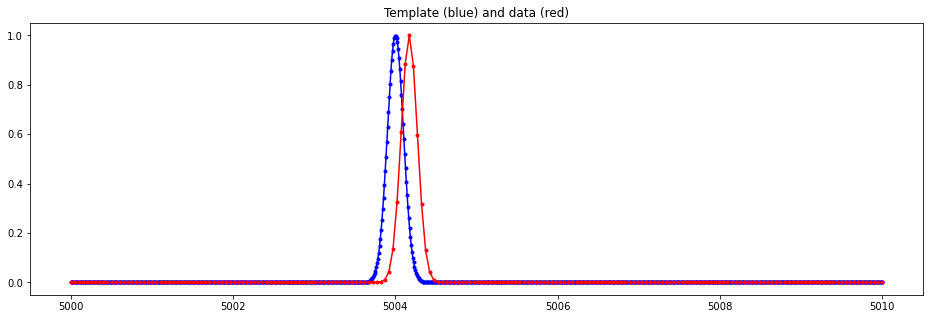

Cross-correlation function is maximized at dRV =  10.200000000000095  km/s
  A red-shift with respect to the template


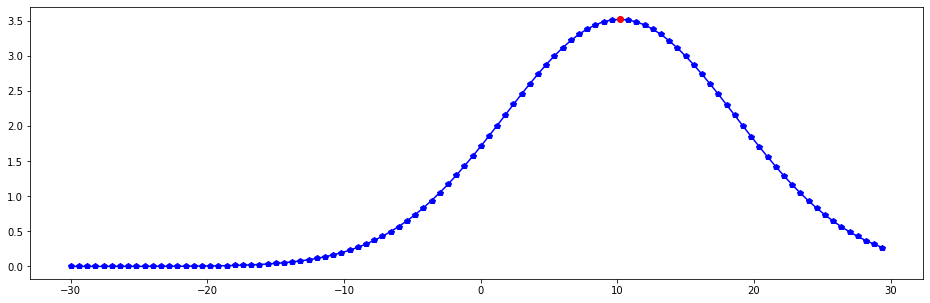

In [4]:
# Example from https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/crosscorr.html

from __future__ import print_function, division
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt

# Create the template
tw = np.linspace(5000, 5010, 1000)
tf = np.exp(-(tw-5004.0)**2/(2.*0.1**2))

# Create data, which are not that well sampled
dw = np.linspace(5000, 5010, 200)
df = np.exp(-(dw-5004.17)**2/(2.*0.1**2))

# Plot template and data
plt.figure(figsize=(16,5))
plt.title("Template (blue) and data (red)")
plt.plot(tw, tf, 'b.-')
plt.plot(dw, df, 'r.-')
plt.show()

# Carry out the cross-correlation.
# The RV-range is -30 - +30 km/s in steps of 0.6 km/s.
# The first and last 20 points of the data are skipped.
rv, cc = pyasl.crosscorrRV(dw, df, tw, tf, -30., 30., 30./50., skipedge=20)

# Find the index of maximum cross-correlation function
maxind = np.argmax(cc)

print("Cross-correlation function is maximized at dRV = ", rv[maxind], " km/s")
if rv[maxind] > 0.0:
    print("  A red-shift with respect to the template")
else:
    print("  A blue-shift with respect to the template")

plt.figure(figsize=(16,5))
plt.plot(rv, cc, 'bp-')
plt.plot(rv[maxind], cc[maxind], 'ro')
plt.show()